In [27]:
from random import random
from math import pi, sin, cos, sqrt, log, exp
import itertools
import matplotlib.pyplot as plt
from timeit import timeit
plt.style.use("ggplot")

In [28]:
def arange(x, y, n=None):
    if n==None:
        return list(range(x,y))
    return [x+(y-x)/n*i for i in range(n)]

In [29]:
def normal(n=1, method="box-muller"):
    
    # Box-Muller transform
    if method == "box-muller":
        remainder = n%2
        quotient = n//2
        m = quotient + remainder
        z = []
        for _ in range(m):
            u1 = random()
            u2 = random()
            theta = 2*pi*u2
            R = sqrt(-2*log(u1))
            z0 = R*cos(theta)
            z1 = R*sin(theta)
            z.append([z0, z1])
            w = list(itertools.chain([x[0] for x in z], [x[1] for x in z]))
            if remainder == 1:
                w = w[:-1]
            if n==1:
                w = w[0]
                
    # Marsaglia polar method
    elif method == "polar":
        remainder = n%2
        quotient = n//2
        m = quotient + remainder
        z = []
        for _ in range(m):
            while(True):
                u = 2*random()-1
                v = 2*random()-1
                s = u**2 + v**2
                if s < 1 and s > 0:
                    z0 = u*sqrt(-2*log(s)/s)
                    z1 = v*sqrt(-2*log(s)/s)
                    break
            z.append([z0, z1])
            w = list(itertools.chain([x[0] for x in z], [x[1] for x in z]))
            if remainder == 1:
                w = w[:-1]
            if n==1:
                w = w[0]
                
    return w

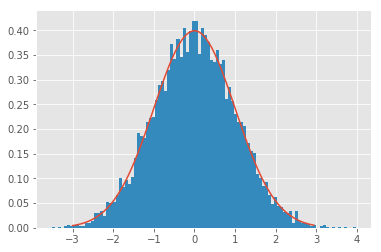

In [30]:
w = normal(10000, "polar")
D = arange(-3,3,100)
y = [1/sqrt(2*pi)*exp(-0.5*x**2) for x in D]

plt.plot(D,y)
plt.hist(w, bins=100, density=True)
plt.show()

In [31]:
mean = sum(w)/len(w)
std = sqrt(sum([(x - mean)**2 for x in w])/len(w))
print("mean : {:>6.3f}".format(mean))
print("std  : {:>6.3f}".format(std))

mean :  0.003
std  :  1.001


In [32]:
timeit('normal(1 ,"box-muller")', setup="from __main__ import normal")

2.465320086937595

In [33]:
timeit('normal(1, "polar")', setup="from __main__ import normal")

3.5866840670914826